In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#how to load the data and read
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2020.csv'
df=pd.read_csv(path)
df.info

<bound method DataFrame.info of          FIPS     Admin2  Province_State        Country_Region  \
0     45001.0  Abbeville  South Carolina                    US   
1     22001.0     Acadia       Louisiana                    US   
2     51001.0   Accomack        Virginia                    US   
3     16001.0        Ada           Idaho                    US   
4     19001.0      Adair            Iowa                    US   
...       ...        ...             ...                   ...   
3435      NaN        NaN             NaN                 Tonga   
3436      NaN        NaN             NaN  Winter Olympics 2022   
3437      NaN        NaN             NaN            Antarctica   
3438      NaN        NaN          Jersey        United Kingdom   
3439      NaN        NaN        Guernsey        United Kingdom   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-05-26 02:32:35  34.223334  -82.461707         35       0   
1     2020-05-26 02:32:35  30.295

In [3]:
#to load the first five data
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


In [4]:
#to drop(remove )the extra column that we don't need at this time and rename the column
df.drop(['FIPS','Admin2','Last_Update','Province_State','Combined_Key'],inplace=True,axis=1)

In [5]:
df.rename(columns={'Country_Region':"Country"},inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8


In [6]:
df.tail()


,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
3435,Tonga,-21.179000,-175.19820,0,0,0,0
3436,Winter Olympics 2022,39.904200,116.40740,0,0,0,0
3437,Antarctica,-71.949900,23.34700,0,0,0,0
3438,United Kingdom,49.213800,-2.13580,302,29,0,0
3439,United Kingdom,49.448196,-2.58949,252,16,0,0


In [7]:
world=df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

C:\Users\hp\AppData\Local\Temp/ipykernel_7420/1889284236.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world=df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9860,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


In [8]:
world.head()

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9860,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


In [9]:
world.tail()

,Country,Confirmed,Active,Recovered,Deaths
189,West Bank and Gaza,423,63,357,3
190,Winter Olympics 2022,0,0,0,0
191,Yemen,233,179,10,44
192,Zambia,920,577,336,7
193,Zimbabwe,56,27,25,4


In [10]:
#plotting the top 20 countries with maximum number of confirmed cases
top_countries=world.sort_values(by=['Confirmed'],ascending=False)

In [11]:
top_countries.head(20)

,Country,Confirmed,Active,Recovered,Deaths
180,US,1654937,1565564,379157,98472
24,Brazil,378840,351425,153833,23590
143,Russia,353427,230996,118798,3633
184,United Kingdom,262542,224393,1161,36996
162,Spain,235400,208566,150376,26834
86,Italy,230158,55300,141981,32877
63,France,184584,90806,65317,28461
67,Germany,180600,11092,161199,8309
179,Turkey,157814,33430,120015,4369
80,India,144950,80072,60706,4172


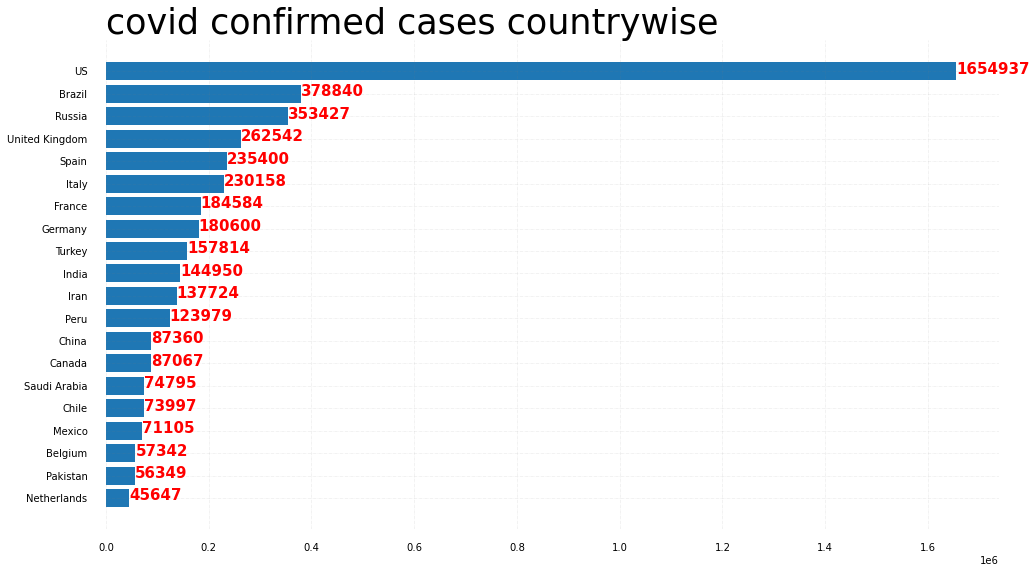

In [12]:
#to draw the barplot of the given data
Country=top_countries['Country'].head(20)
Confirmed=top_countries['Confirmed'].head(20)
fig,ax=plt.subplots(figsize=(16,9))
ax.barh(Country,Confirmed)
for s in['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=15)
ax.grid(b=True,color='grey',linestyle='-.',linewidth=0.5,alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='red')
ax.set_title('covid confirmed cases countrywise',loc='left',fontsize=35)

plt.show()
    



In [13]:
top_5= world.sort_values(by=['Confirmed'],ascending=False).head()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


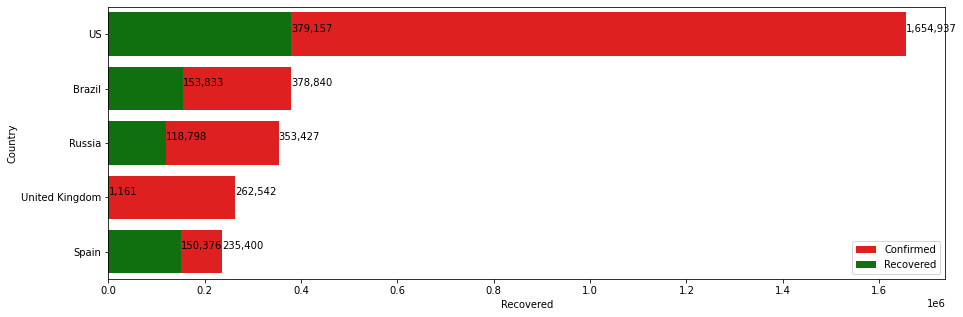

In [14]:
#to draw the barplot showing the max 5 countried with reported confirmred and deaths
plt.figure(figsize=(15,5))
confirmed= sns.barplot(top_5['Confirmed'],top_5['Country'],color='red',label='Confirmed')
recovered= sns.barplot(top_5['Recovered'],top_5['Country'],color='green',label='Recovered')

#add texts for barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=10)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.legend(loc=4)
plt.show()

In [17]:
#using plotly we are plotting the country wise data on the world map
my_plot=px.choropleth(world,locations='Country',locationmode='country names',color='Confirmed',hover_name='Country',color_continuous_scale='sunset',range_color=[1,1000000],title='Countries with Confirmed cases')
my_plot.show()